# • Лабораторная работа по ML №1 Жуховицкий А. Д. ( М8О-303Б-23 )

Установим все необходимые зависимости

In [66]:
!uv sync --frozen --no-install-project --no-dev --no-cache

Audited 112 packages in 12ms


Загрузим датасет

In [67]:
from kagglehub import dataset_download

DATASET_PATH = dataset_download("vikrishnan/boston-house-prices") + "/housing.csv"
COLUMN_NAMES = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Проверим поступившие данные

In [68]:
import pandas as pd
df = pd.read_csv(DATASET_PATH, header=None, delimiter=r"\s+", names=COLUMN_NAMES)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


Рассмотрим типы и основные данные для колонок

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Пропусков значений не обнаружено, можно работать с данными без дополнительной обработки

In [70]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Проанализируем выбросы данных, для этого визуализиируем данные

In [71]:
# Импортируем библиотеки для графиков
import seaborn as sns
import matplotlib.pyplot as plt

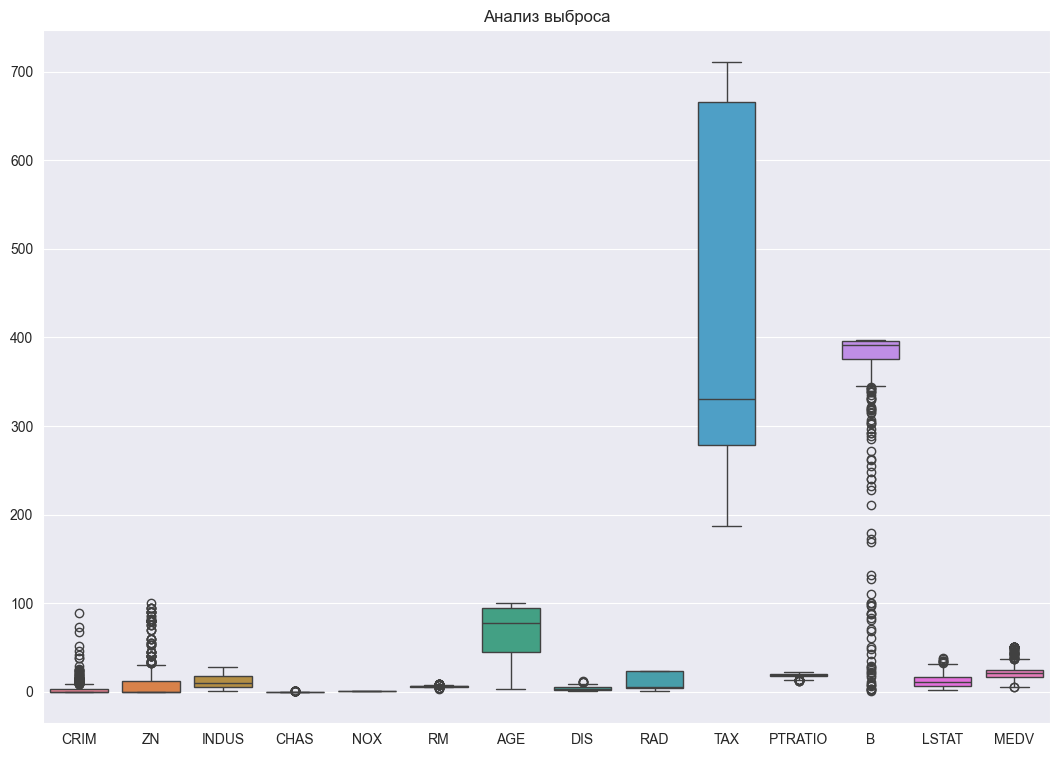

In [72]:
plt.figure(figsize=(13, 9))
sns.boxplot(df)
plt.title("Анализ выброса")
plt.show()

Можно заметить выбросы данных по точкам выделенным на плоте.

Проанализируем корреляцию между колонками.
Визуализируем матрицу корреляции, используя heatmap.

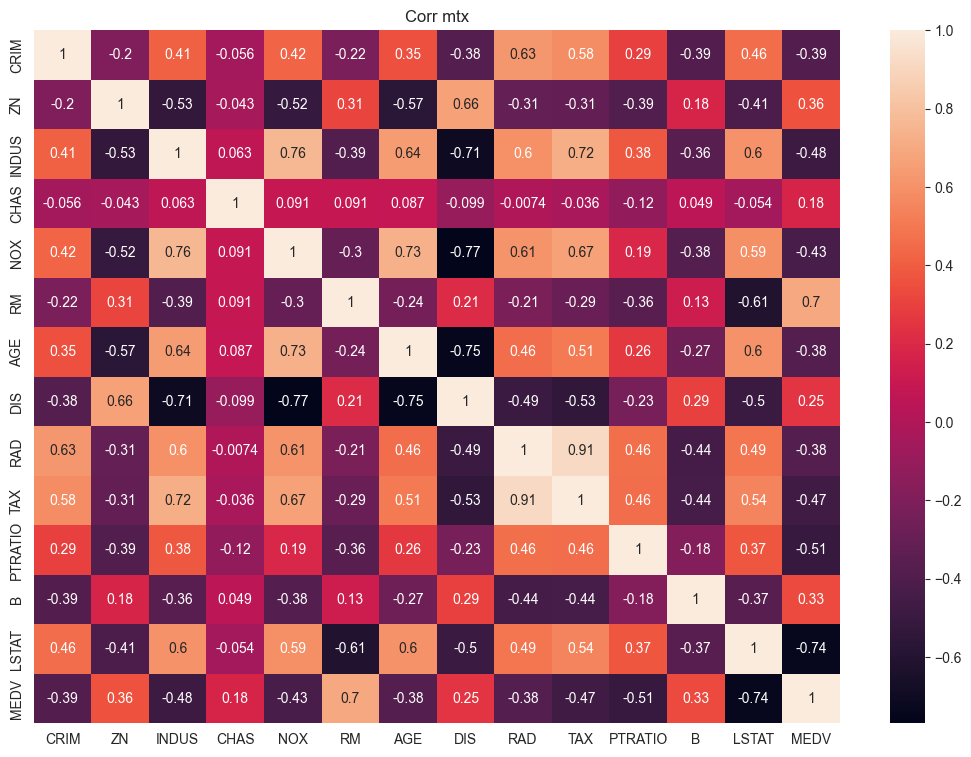

In [73]:
plt.figure(figsize=(13, 9))
sns.heatmap(df.corr(), annot=True)
plt.title("Corr mtx")
plt.show()

Определим каждую колонку:
- CRIM - уровень преступности в городе
- ZN - доля жилой зоны более 25,000 квадратных футов
- INDUS - доля акров не ретейлерского бизнеса в городе
- CHAS - 1 если имеет общую границу с рекой, 0 если нет
- NOX - концентрация оксидов азота (частей на 10 млн)
- RM - среднее количество комнат в жилище
- AGE - доля занятой земли застроенной до 1940 года
- DIS - взвешанное расстояние от 5 бостонских центров трудоустройства
- RAD - индекс близости к радиальным шоссе
- TAX - налог на полную стоимость земли на 10 000 долларов
- PTRATIO - доля количества студентов к количеству учителей в городе
- B - 1000 * (Bk - 0,63) ^ 2, где Bk - доля чернокожих в городе
- LSTAT - % населения в низком статусе
- MEDV - медианная стоимость занятой земли в 1000 долларов


Попробуем предсказывать MEDV, используя все остальные данные. Разделим данные на цель (target) и параметры.

In [74]:
target = df["MEDV"]
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [75]:
params = df.drop("MEDV", axis=1)
params

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


Поделим данные на train и test, будем использовать sklearn для работы с данными и обучения.

In [76]:
from sklearn.model_selection import train_test_split

params_train, params_test, target_train, target_test = train_test_split(params, target, test_size=0.25, train_size=0.75)

Для удобной работы с последовательной обработкой scaler'ом и инструментами sklearn используем Pipeline'ы и составим последовательности обработки с разными вариантами моделей.

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

После обучения моделей снимем метрики и проверим какой вариант покажет себя оптимально.

In [78]:
# Импортируем готовые методы для вычисления метрик
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

- Классическая линейная регрессия

In [79]:
from sklearn.linear_model import LinearRegression
linear_regression_pipeline = Pipeline([("Scaler", StandardScaler()), ("LinearRegression", LinearRegression())])
linear_regression_pipeline

,steps,"[('Scaler', ...), ('LinearRegression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


In [80]:
linear_regression_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('LinearRegression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None


После обучения получим каждую модель и predicted данные.

In [81]:
model_1 : LinearRegression = linear_regression_pipeline.named_steps["LinearRegression"]
target_pred_1 = linear_regression_pipeline.predict(params_test)

- Random forest

In [82]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regressor_pipeline = Pipeline([("Scaler", StandardScaler()), ("RandomForestRegressor", RandomForestRegressor())])
random_forest_regressor_pipeline

,steps,"[('Scaler', ...), ('RandomForestRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [83]:
random_forest_regressor_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('RandomForestRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [84]:
model_2 : RandomForestRegressor = random_forest_regressor_pipeline.named_steps["RandomForestRegressor"]
target_pred_2 = linear_regression_pipeline.predict(params_test)

- Decision tree (дерево решений)

In [85]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_regressor_pipeline = Pipeline([("Scaler", StandardScaler()), ("DecisionTreeRegressor", DecisionTreeRegressor())])
decision_tree_regressor_pipeline

,steps,"[('Scaler', ...), ('DecisionTreeRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [86]:
decision_tree_regressor_pipeline.fit(params_train, target_train)

,steps,"[('Scaler', ...), ('DecisionTreeRegressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [87]:
model_3 : DecisionTreeRegressor = decision_tree_regressor_pipeline.named_steps["DecisionTreeRegressor"]
target_pred_3 = decision_tree_regressor_pipeline.predict(params_test)

# Проанализируем результаты

Сравним MAE, будем искать минимальные

In [88]:
# Linear regression
MAE1 = mean_absolute_error(target_test, target_pred_1)
MAE1

3.2277754837544044

In [89]:
# Random forest
MAE2 = mean_absolute_error(target_test, target_pred_2)
MAE2

3.2277754837544044

In [90]:
# Decision tree
MAE3 = mean_absolute_error(target_test, target_pred_3)
MAE3

2.4039370078740157

Сравним MSE, будем искать минимальные

In [91]:
# Linear regression
MSE1 = mean_squared_error(target_test, target_pred_1)
MSE1

17.6092325576412

In [92]:
# Random forest
MSE2 = mean_squared_error(target_test, target_pred_2)
MSE2

17.6092325576412

In [93]:
# Decision tree
MSE3 = mean_squared_error(target_test, target_pred_3)
MSE3

11.33976377952756

Сравним $r^2$, будем искать максимальный

In [94]:
# Linear regression
R2_1 = r2_score(target_test, target_pred_1)
R2_1

0.6916755520068625

In [95]:
# Random forest
R2_2 = r2_score(target_test, target_pred_2)
R2_2

0.6916755520068625

In [96]:
# Decision tree
R2_3 = r2_score(target_test, target_pred_3)
R2_3

0.8014492456584519

• Decision Tree показывает наилучший результат среди нескольких испытаний!

# Рассмотрим влияение каждого параметра на итоговый результат для каждой модели, проанализируем веса.

In [97]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_1.coef_})

,Params,Weights
0,CRIM,-1.148416
1,ZN,1.216764
2,INDUS,0.418715
3,CHAS,0.501918
4,NOX,-2.594241
5,RM,2.568483
6,AGE,0.268245
7,DIS,-3.419888
8,RAD,3.213882
9,TAX,-2.385177


In [98]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_2.feature_importances_})

,Params,Weights
0,CRIM,0.033238
1,ZN,0.001046
2,INDUS,0.006463
3,CHAS,0.000586
4,NOX,0.029267
5,RM,0.431300
6,AGE,0.013434
7,DIS,0.064431
8,RAD,0.004186
9,TAX,0.013199


In [99]:
pd.DataFrame({"Params": params_train.columns, "Weights": model_3.feature_importances_})

,Params,Weights
0,CRIM,0.056086
1,ZN,0.001206
2,INDUS,0.002272
3,CHAS,0.000303
4,NOX,0.035959
5,RM,0.577025
6,AGE,0.008178
7,DIS,0.076876
8,RAD,0.000383
9,TAX,0.009318
